In [819]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import stats
import seaborn as sns
sns.set_context('paper')
import os

In [820]:
data_path='/Users/danielbabin/Documents/GitHub/Zircon_Standards/Results/'
figure_path='/Users/danielbabin/Documents/LamontColumbia/2020Spring/Orals/Figures/'

In [821]:
_20=pd.read_csv(data_path+'Standards_Test_20um.csv')
_40=pd.read_csv(data_path+'Standards_Test_40um.csv')
literature=pd.read_csv('/Users/danielbabin/Documents/GitHub/Zircon_Standards/Supplementary Data/standards_composition.csv')

In [822]:
def fix(file):
    file['Unnamed: 0'].fillna(method='ffill',inplace=True)
    file=file.loc[0:file[file['Unnamed: 0']=='Mass Spectrometer Files'].index[0]].copy()
    file['Start time']=pd.to_datetime(file['Start time'])
    file=file.set_index(['Unnamed: 0','Start time'],drop=False)
    return file

In [823]:
_20=fix(_20)
_40=fix(_40)

In [824]:
λ238=1.55125E-10
λ235=9.8485E-10
λ232=4.9475E-11
time=np.linspace(0,4500000000,10000)
conchordia=pd.DataFrame(index=time)
conchordia['Time']=time
conchordia['206/238']=np.exp(conchordia.index*λ238)-1
conchordia['207/235']=np.exp(conchordia.index*λ235)-1
conchordia['207/206']=conchordia['207/235']/conchordia['206/238']/137.88
conchordia['238/206']=1/conchordia['206/238']
conchordia.iloc[0,3]=np.NaN
conchordia.set_index('207/235',inplace=True,drop=False)

# U/Pb Ratios and Ages from Literature
Compiled. Uncertainty from ages represents an age range spanned by the 235 and 238 ages. It should be noted that the uncertainty for the ages are extremely small relative to our uncertainties (factor of 10-20)

In [825]:
literature

,Standard,206/238,2s,207/235,2s.1,207/206,2s.2,Reference,Age,Age 2s
0,FC1,0.185325,0.000183,1.944989,0.001828,0.076117,0.000017,"Mattison et al., 2010",1098.0,1.5
1,FC1,0.185197,0.000183,1.944437,0.001828,0.076148,0.000017,"Mattison et al., 2011",1098.0,1.5
2,FC1,0.185133,0.000183,1.943462,0.001828,0.076136,0.000017,"Mattison et al., 2012",1098.0,1.5
3,FC1,0.185137,0.000183,1.943079,0.001828,0.076119,0.000017,"Mattison et al., 2013",1098.0,1.5
4,FC1,0.185173,0.000183,1.943614,0.001828,0.076126,0.000017,"Mattison et al., 2014",1098.0,1.5
5,FC1,0.185042,0.000183,1.942256,0.001828,0.076126,0.000017,"Mattison et al., 2015",1098.0,1.5
6,FC1,0.185148,0.000183,1.943424,0.001828,0.076128,0.000017,"Mattison et al., 2016",1098.0,1.5
7,FC1,0.185236,0.000183,1.944160,0.001828,0.076121,0.000017,"Mattison et al., 2017",1098.0,1.5
8,FC1,0.185354,0.000183,1.945402,0.001828,0.076121,0.000017,"Mattison et al., 2018",1098.0,1.5
9,FC1,0.185243,0.000183,1.944626,0.001828,0.076137,0.000017,"Mattison et al., 2019",1098.0,1.5


# Columns

In [826]:
_20.columns[:100]

Index(['Unnamed: 0', 'Start time', 'Duration (s)', 'Hg202_mean', 'Hg202_2SE',
       'Hg202_NoOfPoints', 'Pb204_mean', 'Pb204_2SE', 'Pb204_NoOfPoints',
       'Pb206_mean', 'Pb206_2SE', 'Pb206_NoOfPoints', 'Pb207_mean',
       'Pb207_2SE', 'Pb207_NoOfPoints', 'Pb208_mean', 'Pb208_2SE',
       'Pb208_NoOfPoints', 'Th232_mean', 'Th232_2SE', 'Th232_NoOfPoints',
       'U238_mean', 'U238_2SE', 'U238_NoOfPoints', 'U235_mean', 'U235_2SE',
       'U235_NoOfPoints', 'TotalBeam_mean', 'TotalBeam_2SE',
       'TotalBeam_NoOfPoints', 'BeamSeconds_mean', 'BeamSeconds_2SE',
       'BeamSeconds_NoOfPoints', 'Mask_mean', 'Mask_2SE', 'Mask_NoOfPoints',
       'Hg202_CPS_mean', 'Hg202_CPS_2SE', 'Hg202_CPS_NoOfPoints',
       'Pb204_CPS_mean', 'Pb204_CPS_2SE', 'Pb204_CPS_NoOfPoints',
       'Pb206_CPS_mean', 'Pb206_CPS_2SE', 'Pb206_CPS_NoOfPoints',
       'Pb207_CPS_mean', 'Pb207_CPS_2SE', 'Pb207_CPS_NoOfPoints',
       'Pb208_CPS_mean', 'Pb208_CPS_2SE', 'Pb208_CPS_NoOfPoints',
       'Th232_CPS_mean', 

In [827]:
_20.columns[100:200]

Index(['DC Pb208/Th232_2SE', 'DC Pb208/Th232_NoOfPoints',
       'DC Pb208/Th232 age_mean', 'DC Pb208/Th232 age_2SE',
       'DC Pb208/Th232 age_NoOfPoints', 'DC Pb207/Pb206_mean',
       'DC Pb207/Pb206_2SE', 'DC Pb207/Pb206_NoOfPoints',
       'DC Pb207/Pb206 age_mean', 'DC Pb207/Pb206 age_2SE',
       'DC Pb207/Pb206 age_NoOfPoints', 'Final Pb206/U238_mean',
       'Final Pb206/U238_2SE', 'Final Pb206/U238_NoOfPoints',
       'Final Pb206/U238 age_mean', 'Final Pb206/U238 age_2SE',
       'Final Pb206/U238 age_NoOfPoints', 'Final Pb207/U235_mean',
       'Final Pb207/U235_2SE', 'Final Pb207/U235_NoOfPoints',
       'Final Pb207/U235 age_mean', 'Final Pb207/U235 age_2SE',
       'Final Pb207/U235 age_NoOfPoints', 'Final Pb208/Th232_mean',
       'Final Pb208/Th232_2SE', 'Final Pb208/Th232_NoOfPoints',
       'Final Pb208/Th232 age_mean', 'Final Pb208/Th232 age_2SE',
       'Final Pb208/Th232 age_NoOfPoints', 'Final Pb207/Pb206_mean',
       'Final Pb207/Pb206_2SE', 'Final Pb207/Pb206

# Weighted Mean Error

In [828]:
zircons=['9435', 'OG1', 'ORA', 'TAN', 'TEM', 'Z_91500', 'Z_Plesovice']

In [829]:
age_keys=['206','207','208','76']
age_text=['Final Pb206/U238','Final Pb207/U235','Final Pb208/Th232','Final Pb207/Pb206']

In [830]:
for z in zircons:
    for i,kind in enumerate(age_keys):        
        _20.loc[z,'w']=1/(_20.loc[z,age_text[i]+' age_2SE']**2).values
        _20.loc[z,'age*w']=(_20.loc[z,age_text[i]+' age_mean']*_20.loc[z,'w']).values
        _20.loc[z,'w_mean_'+kind+'_age']=(_20.loc[z,'age*w'].sum())/_20.loc[z,'w'].sum()
        _20.loc[z,'w_mean_'+kind+'_2SE']=(_20.loc[z,age_text[i]+' age_mean'].std()*2/
                                          np.sqrt(len(_20.loc[z,age_text[i]+' age_mean'])))

In [831]:
for z in zircons:
    for i,kind in enumerate(age_keys):        
        _40.loc[z,'w']=1/(_40.loc[z,age_text[i]+' age_2SE']**2).values
        _40.loc[z,'age*w']=(_40.loc[z,age_text[i]+' age_mean']*_40.loc[z,'w']).values
        _40.loc[z,'w_mean_'+kind+'_age']=(_40.loc[z,'age*w'].sum())/_40.loc[z,'w'].sum()
        _40.loc[z,'w_mean_'+kind+'_2SE']=(_40.loc[z,age_text[i]+' age_mean'].std()*2/
                                          np.sqrt(len(_40.loc[z,age_text[i]+' age_mean'])))

## Figure

In [832]:
literature.set_index('Standard',inplace=True,drop=False)

In [833]:
literature.head()

,Standard,206/238,2s,207/235,2s.1,207/206,2s.2,Reference,Age,Age 2s
Standard,,,,,,,,,,
FC1,FC1,0.185325,0.000183,1.944989,0.001828,0.076117,0.000017,"Mattison et al., 2010",1098.0,1.5
FC1,FC1,0.185197,0.000183,1.944437,0.001828,0.076148,0.000017,"Mattison et al., 2011",1098.0,1.5
FC1,FC1,0.185133,0.000183,1.943462,0.001828,0.076136,0.000017,"Mattison et al., 2012",1098.0,1.5
FC1,FC1,0.185137,0.000183,1.943079,0.001828,0.076119,0.000017,"Mattison et al., 2013",1098.0,1.5
FC1,FC1,0.185173,0.000183,1.943614,0.001828,0.076126,0.000017,"Mattison et al., 2014",1098.0,1.5


In [834]:
literature['238/206']=1/literature['206/238']
literature['238/206_2s']=literature['2s']/literature['206/238']*literature['238/206']

### Conchordia

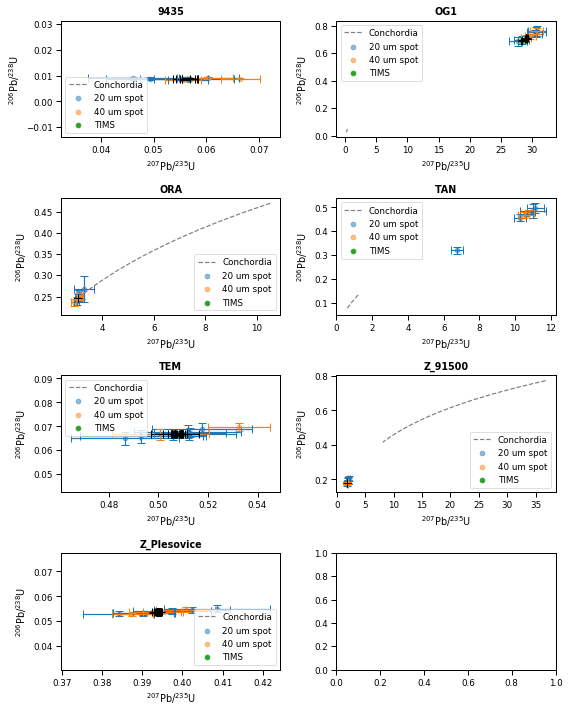

In [851]:
fig,axes=plt.subplots(figsize=(8,10),nrows=4,ncols=2)
for i,z in enumerate(zircons):
    ax=plt.subplot(4,2,i+1)
    
    for df in [_20.loc[z],_40.loc[z]]:
        ax.scatter(df['Final Pb207/U235_mean'],df['Final Pb206/U238_mean'],alpha=.5)
        ax.errorbar(x=df['Final Pb207/U235_mean'],y=df['Final Pb206/U238_mean'],
               xerr=df['Final Pb207/U235_2SE'],yerr=df['Final Pb206/U238_2SE'],ls='',capsize=4,capthick=1)
        ax.set_title(z,fontweight='bold')
        ax.set_ylabel('$^{206}$Pb/$^{238}$U')
        ax.set_xlabel('$^{207}$Pb/$^{235}$U')
     
    df=literature.loc[z]
    ax.scatter(df['207/235'],df['206/238'])
    ax.errorbar(x=df['207/235'],y=df['206/238'],
               xerr=df['2s.1'],yerr=df['2s'],ls='',capsize=4,capthick=1,color='k')
    
    l=df['207/235'].mean()*.7
    h=df['207/235'].mean()*1.3
    ax.plot(conchordia.loc[l:h,'207/235'],
            conchordia.loc[l:h,'206/238'],color='grey',ls='--')
    
    ax.legend(['Conchordia','20 um spot','40 um spot','TIMS'])
plt.tight_layout()
fig.savefig(figure_path+'09a_test_conchordia.png',dpi=500)

### Tera-Wasserburg

In [852]:
zircons=['OG1', 'ORA', 'TAN', 'Z_91500']

In [853]:
conchordia.set_index('238/206',inplace=True,drop=False)
conchordia.sort_index(inplace=True)

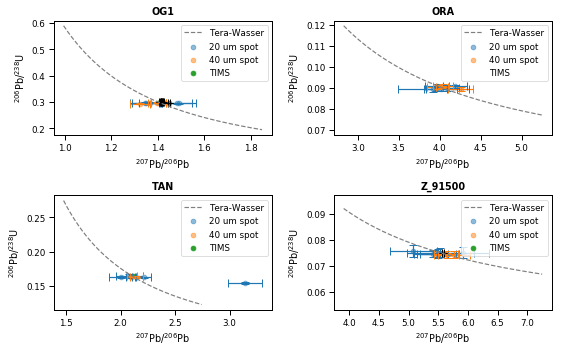

In [854]:
fig,axes=plt.subplots(figsize=(8,5),nrows=2,ncols=2)
for i,z in enumerate(zircons):
    ax=plt.subplot(2,2,i+1)
    
    for df in [_20.loc[z],_40.loc[z]]:
        ax.scatter(df['Final U238/Pb206_mean'],df['Final Pb207/Pb206_mean'],alpha=.5)
        ax.errorbar(x=df['Final U238/Pb206_mean'],y=df['Final Pb207/Pb206_mean'],
               xerr=df['Final U238/Pb206_2SE'],yerr=df['Final Pb207/Pb206_2SE'],ls='',capsize=4,capthick=1)
        ax.set_title(z,fontweight='bold')
        ax.set_ylabel('$^{206}$Pb/$^{238}$U')
        ax.set_xlabel('$^{207}$Pb/$^{206}$Pb')
     
    df=literature.loc[z]
    ax.scatter(df['238/206'],df['207/206'])
    ax.errorbar(x=df['238/206'],y=df['207/206'],
               xerr=df['238/206_2s'],yerr=df['2s.2'],ls='',capsize=4,capthick=1,color='k')
    
    l=df['238/206'].mean()*.7
    h=df['238/206'].mean()*1.3
    ax.plot(conchordia.loc[l:h,'238/206'],
            conchordia.loc[l:h,'207/206'],color='grey',ls='--')
    ax.legend(['Tera-Wasser','20 um spot','40 um spot','TIMS'])
plt.tight_layout()
fig.savefig(figure_path+'09b_test_tera-was.png',dpi=500)

### Age-Age

In [855]:
zircons=['9435', 'OG1', 'ORA', 'TAN', 'TEM', 'Z_91500', 'Z_Plesovice']

In [856]:
literature.set_index('Standard',inplace=True,drop=False)

In [857]:
for z in zircons:
    _20.loc[z,'Accepted Age']=literature.loc[z,'Age'].mean()
    _20.loc[z,'Accepted Age 2S']=literature.loc[z,'Age 2s'].mean()
    if _20.loc[z,'Final Pb206/U238 age_mean'].mean()>1200:
        _20.loc[z,'Best Age']=_20.loc[z,'Final Pb207/Pb206 age_mean'].values
        _20.loc[z,'Best Age 2S']=_20.loc[z,'Final Pb207/Pb206 age_2SE'].values
    else:
        _20.loc[z,'Best Age']=_20.loc[z,'Final Pb206/U238 age_mean'].values
        _20.loc[z,'Best Age 2S']=_20.loc[z,'Final Pb206/U238 age_2SE'].values

In [858]:
for z in zircons:
    _40.loc[z,'Accepted Age']=literature.loc[z,'Age'].mean()
    _40.loc[z,'Accepted Age 2S']=literature.loc[z,'Age 2s'].mean()
    if _40.loc[z,'Final Pb206/U238 age_mean'].mean()>1200:
        _40.loc[z,'Best Age']=_40.loc[z,'Final Pb207/Pb206 age_mean'].values
        _40.loc[z,'Best Age 2S']=_40.loc[z,'Final Pb207/Pb206 age_2SE'].values
    else:
        _40.loc[z,'Best Age']=_40.loc[z,'Final Pb206/U238 age_mean'].values
        _40.loc[z,'Best Age 2S']=_40.loc[z,'Final Pb206/U238 age_2SE'].values

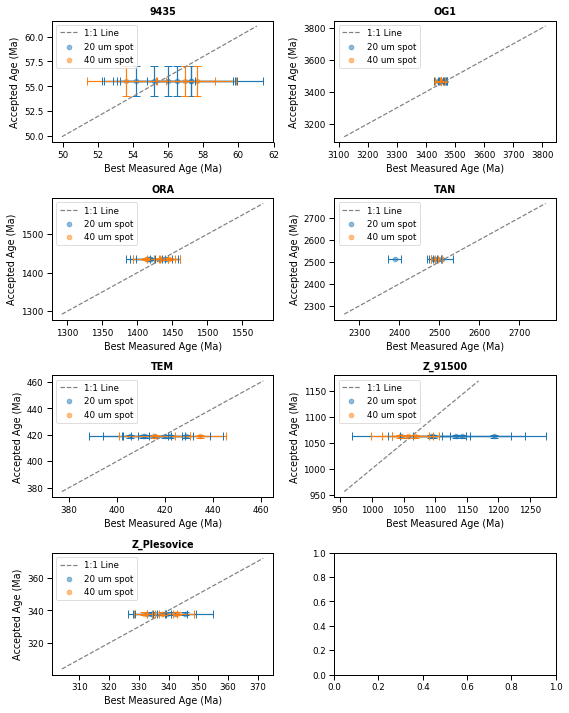

In [859]:
fig,axes=plt.subplots(figsize=(8,10),nrows=4,ncols=2)
for i,z in enumerate(zircons):
    ax=plt.subplot(4,2,i+1)
    
    for df in [_20.loc[z],_40.loc[z]]:
        ax.scatter(df['Best Age'],df['Accepted Age'],alpha=.5)
        ax.errorbar(y=df['Accepted Age'],x=df['Best Age'],
               yerr=df['Accepted Age 2S'],xerr=df['Best Age 2S'],ls='',capsize=4,capthick=1)
        ax.set_title(z,fontweight='bold')
        ax.set_ylabel('Accepted Age (Ma)')
        ax.set_xlabel('Best Measured Age (Ma)')
    
    l=df['Accepted Age'].mean()*.9
    h=df['Accepted Age'].mean()*1.1
    xys=np.linspace(l,h,10)
    ax.plot(xys,
            xys,color='grey',ls='--')
    ax.legend(['1:1 Line','20 um spot','40 um spot'])
plt.tight_layout()
fig.savefig(figure_path+'09c_test_age-age.png',dpi=500)

# Statistics
## Percent Error

In [860]:
for df in [_20,_40]:
    for i,text in enumerate(age_text[:3]):
        df.loc[zircons,text+' %2SE']=(df.loc[zircons,text+' age_2SE']/
                                      df.loc[zircons,text+' age_mean']*100).values

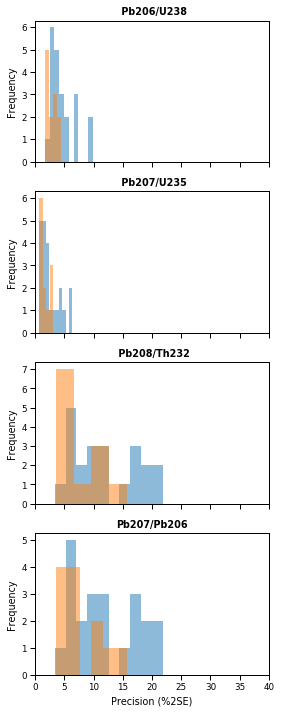

In [862]:
fig,axes=plt.subplots(nrows=4,figsize=(4,10),sharex=True)
for i,text in enumerate(age_text[:3]):
    (_20.loc[zircons,text+' age_2SE']/
     _20.loc[zircons,text+' age_mean']*100).plot(kind='hist',ax=axes[i],alpha=.5)
    axes[i].set_xlim(0,40)
    axes[i].set_title(text[5:],fontweight='bold')
    axes[i].set_xlabel('% Error')
    
for i,text in enumerate(age_text[:3]):
    (_40.loc[zircons,text+' age_2SE']/
     _40.loc[zircons,text+' age_mean']*100).plot(kind='hist',ax=axes[i],alpha=.5,bins=4)
    axes[i].set_xlim(0,40)
    axes[i].set_title(text[5:],fontweight='bold')
    axes[i].set_xlabel('% Error')
    
ax=axes[3]
zircons=['OG1', 'ORA', 'TAN', 'Z_91500']
(_20.loc[zircons,text+' age_2SE']/
_20.loc[zircons,text+' age_mean']*100).plot(kind='hist',ax=ax,alpha=.5)
(_40.loc[zircons,text+' age_2SE']/
_40.loc[zircons,text+' age_mean']*100).plot(kind='hist',ax=ax,alpha=.5,bins=6)
ax.set_xlim(0,40)
ax.set_xlabel('Precision (%2SE)')
ax.set_title('Pb207/Pb206',fontweight='bold')

plt.tight_layout()

fig.savefig(figure_path+'10_test_uncertainty.png',dpi=500)

# Sources of Error

In [863]:
zircons=['9435', 'OG1', 'ORA', 'TAN', 'TEM', 'Z_91500', 'Z_Plesovice']

In [864]:
_20.columns[0:100]

Index(['Unnamed: 0', 'Start time', 'Duration (s)', 'Hg202_mean', 'Hg202_2SE',
       'Hg202_NoOfPoints', 'Pb204_mean', 'Pb204_2SE', 'Pb204_NoOfPoints',
       'Pb206_mean', 'Pb206_2SE', 'Pb206_NoOfPoints', 'Pb207_mean',
       'Pb207_2SE', 'Pb207_NoOfPoints', 'Pb208_mean', 'Pb208_2SE',
       'Pb208_NoOfPoints', 'Th232_mean', 'Th232_2SE', 'Th232_NoOfPoints',
       'U238_mean', 'U238_2SE', 'U238_NoOfPoints', 'U235_mean', 'U235_2SE',
       'U235_NoOfPoints', 'TotalBeam_mean', 'TotalBeam_2SE',
       'TotalBeam_NoOfPoints', 'BeamSeconds_mean', 'BeamSeconds_2SE',
       'BeamSeconds_NoOfPoints', 'Mask_mean', 'Mask_2SE', 'Mask_NoOfPoints',
       'Hg202_CPS_mean', 'Hg202_CPS_2SE', 'Hg202_CPS_NoOfPoints',
       'Pb204_CPS_mean', 'Pb204_CPS_2SE', 'Pb204_CPS_NoOfPoints',
       'Pb206_CPS_mean', 'Pb206_CPS_2SE', 'Pb206_CPS_NoOfPoints',
       'Pb207_CPS_mean', 'Pb207_CPS_2SE', 'Pb207_CPS_NoOfPoints',
       'Pb208_CPS_mean', 'Pb208_CPS_2SE', 'Pb208_CPS_NoOfPoints',
       'Th232_CPS_mean', 

## Uranium Signal Intensity and Instability
### U and Pb counts

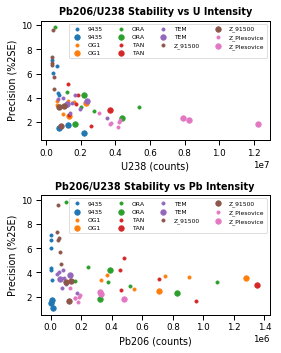

In [865]:
fig,axes=plt.subplots(nrows=2,figsize=(4,5))
ax=axes[0]
colors=sns.color_palette(n_colors=7).as_hex()
param='U238_mean'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param],_20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param],_40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=6)
ax.set_xlabel('U238 (counts)')
ax.set_ylabel('Precision (%2SE)')
ax.set_title('Pb206/U238 Stability vs U Intensity',fontweight='bold')

ax=axes[1]
colors=sns.color_palette(n_colors=7).as_hex()
param='Pb206_mean'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param],_20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param],_40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=6)
ax.set_xlabel('Pb206 (counts)')
ax.set_ylabel('Precision (%2SE)')
ax.set_title('Pb206/U238 Stability vs Pb Intensity',fontweight='bold')
ax.ticklabel_format(axis='x',style='scientific',scilimits=(0,0))

plt.tight_layout()

### U and Pb stability

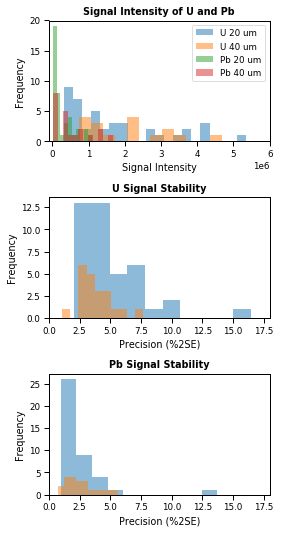

In [866]:
fig,axes=plt.subplots(nrows=3,figsize=(4,10*3/4))
ax=axes[0]
_20.loc[zircons,'U238_mean'].plot(kind='hist',ax=ax,alpha=.5,bins=20)
_40.loc[zircons,'U238_mean'].plot(kind='hist',ax=ax,alpha=.5,bins=35)
_20.loc[zircons,'Pb206_mean'].astype(float).plot(kind='hist',ax=ax,alpha=.5,bins=10)
_40.loc[zircons,'Pb206_mean'].astype(float).plot(kind='hist',ax=ax,alpha=.5,bins=12)
ax.set_xlabel('Signal Intensity')
ax.legend(['U 20 um','U 40 um','Pb 20 um','Pb 40 um'])
ax.set_title('Signal Intensity of U and Pb',fontweight='bold')
ax.ticklabel_format(axis='x',style='scientific',scilimits=(0,0))
ax.set_xlim(-.01e7,.6e7)

ax=axes[1]
(_20.loc[zircons,'U238_2SE']/_20.loc[zircons,'U238_mean']*100).plot(kind='hist',ax=ax,alpha=.5)
(_40.loc[zircons,'U238_2SE']/_40.loc[zircons,'U238_mean']*100).plot(kind='hist',ax=ax,alpha=.5)
ax.set_xlim(0,18)
ax.set_title('U Signal Stability',fontweight='bold')
ax.set_xlabel('Precision (%2SE)')

ax=axes[2]
(_20.loc[zircons,'Pb206_2SE'].astype('float')/
 _20.loc[zircons,'Pb206_mean'].astype('float')*100).plot(kind='hist',ax=ax,alpha=.5)
(_40.loc[zircons,'Pb206_2SE'].astype('float')/
 _40.loc[zircons,'Pb206_mean'].astype('float')*100).plot(kind='hist',ax=ax,alpha=.5)
ax.set_xlim(0,18)
ax.set_title('Pb Signal Stability',fontweight='bold')
ax.set_xlabel('Precision (%2SE)')

plt.tight_layout()

## Duration of Analysis

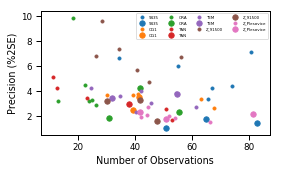

In [867]:
fig,axes=plt.subplots(nrows=1,figsize=(4,10/4))
ax=axes
colors=sns.color_palette(n_colors=7).as_hex()
param='Duration (s)'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param].astype(float)*5,
               _20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param].astype(float)*5,
               _40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=4)
ax.set_xlabel('Number of Observations')
ax.set_ylabel('Precision (%2SE)')
plt.tight_layout()

# Figure with all

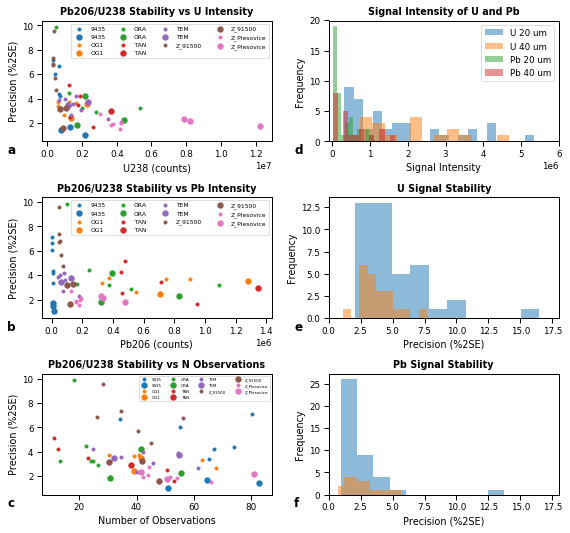

In [868]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(8,10*3/4))

zircons=['9435', 'OG1', 'ORA', 'TAN', 'TEM', 'Z_91500', 'Z_Plesovice']

ax=axes[0,0]
colors=sns.color_palette(n_colors=7).as_hex()
param='U238_mean'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param],_20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param],_40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=6)
ax.set_xlabel('U238 (counts)')
ax.set_ylabel('Precision (%2SE)')
ax.set_title('Pb206/U238 Stability vs U Intensity',fontweight='bold')

ax.annotate('a',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

ax=axes[1,0]
colors=sns.color_palette(n_colors=7).as_hex()
param='Pb206_mean'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param],_20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param],_40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=6)
ax.set_xlabel('Pb206 (counts)')
ax.set_ylabel('Precision (%2SE)')
ax.set_title('Pb206/U238 Stability vs Pb Intensity',fontweight='bold')
ax.ticklabel_format(axis='x',style='scientific',scilimits=(0,0))

ax.annotate('b',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

ax=axes[2,0]
colors=sns.color_palette(n_colors=7).as_hex()
param='Duration (s)'
for i,z in enumerate(zircons):
    ax.scatter(_20.loc[z,param].astype(float)*5,
               _20.loc[z,'Final Pb206/U238 %2SE'],label=z,s=10,c=colors[i])
    ax.scatter(_40.loc[z,param].astype(float)*5,
               _40.loc[z,'Final Pb206/U238 %2SE'],label=z,s=30,c=colors[i])
ax.legend(ncol=4,fontsize=4)
ax.set_xlabel('Number of Observations')
ax.set_ylabel('Precision (%2SE)')
ax.set_title('Pb206/U238 Stability vs N Observations',fontweight='bold') 

ax.annotate('c',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

ax=axes[0,1]
_20.loc[zircons,'U238_mean'].plot(kind='hist',ax=ax,alpha=.5,bins=20)
_40.loc[zircons,'U238_mean'].plot(kind='hist',ax=ax,alpha=.5,bins=35)
_20.loc[zircons,'Pb206_mean'].astype(float).plot(kind='hist',ax=ax,alpha=.5,bins=10)
_40.loc[zircons,'Pb206_mean'].astype(float).plot(kind='hist',ax=ax,alpha=.5,bins=12)
ax.set_xlabel('Signal Intensity')
ax.legend(['U 20 um','U 40 um','Pb 20 um','Pb 40 um'])
ax.set_title('Signal Intensity of U and Pb',fontweight='bold')
ax.ticklabel_format(axis='x',style='scientific',scilimits=(0,0))
ax.set_xlim(-.01e7,.6e7)

ax.annotate('d',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

ax=axes[1,1]
(_20.loc[zircons,'U238_2SE']/_20.loc[zircons,'U238_mean']*100).plot(kind='hist',ax=ax,alpha=.5)
(_40.loc[zircons,'U238_2SE']/_40.loc[zircons,'U238_mean']*100).plot(kind='hist',ax=ax,alpha=.5)
ax.set_xlim(0,18)
ax.set_title('U Signal Stability',fontweight='bold')
ax.set_xlabel('Precision (%2SE)')

ax.annotate('e',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

ax=axes[2,1]
(_20.loc[zircons,'Pb206_2SE'].astype('float')/
 _20.loc[zircons,'Pb206_mean'].astype('float')*100).plot(kind='hist',ax=ax,alpha=.5)
(_40.loc[zircons,'Pb206_2SE'].astype('float')/
 _40.loc[zircons,'Pb206_mean'].astype('float')*100).plot(kind='hist',ax=ax,alpha=.5)
ax.set_xlim(0,18)
ax.set_title('Pb Signal Stability',fontweight='bold')
ax.set_xlabel('Precision (%2SE)')

ax.annotate('f',xy=(-.15,-.1),xycoords='axes fraction',fontsize=12,fontweight='bold')

plt.tight_layout()

fig.savefig(figure_path+'11_test_uncertainty_sources.png',dpi=500)

# Pb204

In [869]:
_20['Pb204_baseline']=_20.loc['Baseline','Pb204_mean'].astype(float).mean()
_40['Pb204_baseline']=_40.loc['Baseline','Pb204_mean'].astype(float).mean()

In [870]:
_20.loc['Baseline','Hg202_mean'].astype(float).mean()

1149.5720930232562

In [871]:
_20.loc[zircons,'Pb204_sig:bkgd']=(_20.loc[zircons,'Pb204_mean'].astype(float)/
                                   _20.loc[zircons,'Pb204_baseline'].astype(float))
_40.loc[zircons,'Pb204_sig:bkgd']=(_40.loc[zircons,'Pb204_mean'].astype(float)/
                                   _40.loc[zircons,'Pb204_baseline'].astype(float))

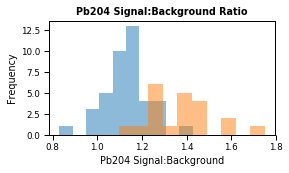

In [872]:
fig,ax=plt.subplots(nrows=1,figsize=(4,10/4))
_20.loc[zircons,'Pb204_sig:bkgd'].plot(kind='hist',ax=ax,alpha=.5)
_40.loc[zircons,'Pb204_sig:bkgd'].plot(kind='hist',ax=ax,alpha=.5)
ax.set_title('Pb204 Signal:Background Ratio',fontweight='bold')
ax.set_xlabel('Pb204 Signal:Background')
plt.tight_layout()
fig.savefig(figure_path+'12_test_204Pb.png',dpi=500)